In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from ml_lib import LinearSVC as MyLinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

csvc = MyLinearSVC(C=1.0, max_iter=1000, learning_rate=1e-5)
svc = LinearSVC(C=1.0, max_iter=1000)
scaler = StandardScaler()
X = scaler.fit_transform(X)

csvc.fit(X, y)
svc.fit(X, y)

y_pred = csvc.predict(X)
print("MyLinearSVC accuracy:", accuracy_score(y, y_pred))

y_pred = svc.predict(X)
print("LinearSVC accuracy:", accuracy_score(y, y_pred))

MyLinearSVC accuracy: 0.87
LinearSVC accuracy: 0.87


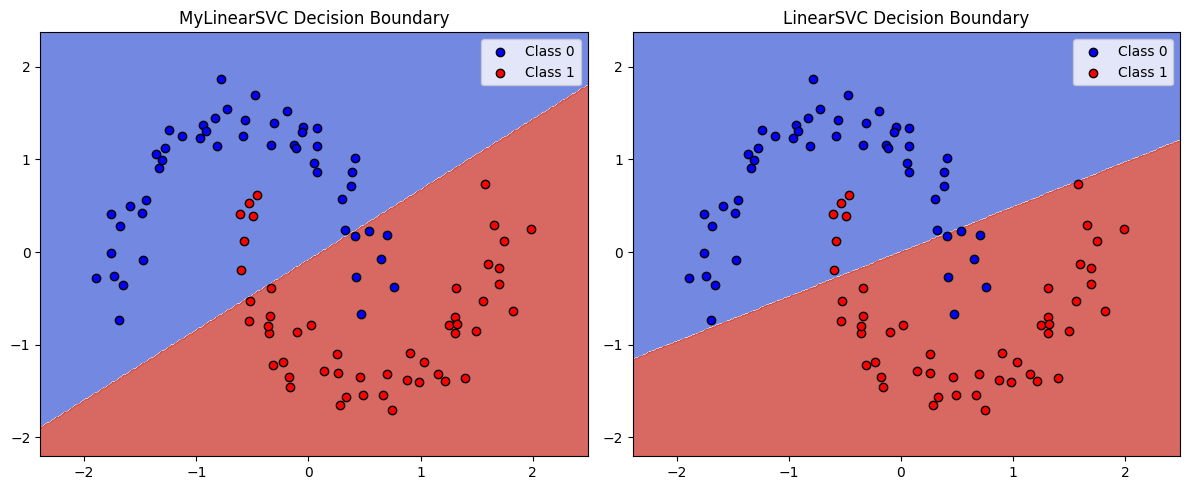

In [4]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    colors = ['blue', 'red']

    for val in np.unique(y):
        ax.scatter(X[y == val, 0], X[y == val, 1], c=colors[val], label=f'Class {val}', edgecolor='k')
    
    ax.set_title(title)
    ax.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(csvc, X, y, ax1, "MyLinearSVC Decision Boundary")
plot_decision_boundary(svc, X, y, ax2, "LinearSVC Decision Boundary")
plt.tight_layout()

In [5]:
print([csvc.w_, csvc.b_]) 
print([svc.coef_, svc.intercept_]) 

[array([ 0.50740768, -0.66920786]), -0.05881000000000002]
[array([[ 0.36089738, -0.7455612 ]]), array([-0.00062988])]
